In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(
   r".\sales_tbl_1.csv",
    parse_dates=["orderdate"],
    index_col="orderdate"
)
df.head()

,orderkey,linenumber,deliverydate,customerkey,storekey,productkey,quantity,unitprice,netprice,unitcost,currencycode,exchangerate,currentstock
orderdate,,,,,,,,,,,,,
2015-01-13,13005,0,1/13/2015,390139,90,147,3,2319.992,2134.39264,768.656,CAD,1.19657,801
2015-01-14,14000,1,1/14/2015,1185065,420,1904,2,674.250,674.25000,310.065,GBP,0.65843,800
2015-01-14,14002,1,1/14/2015,708902,280,2095,2,1106.250,1050.93750,366.525,EUR,0.84926,799
2015-01-14,14003,0,1/14/2015,591175,220,1660,2,173.994,173.99400,57.648,EUR,0.84926,800
2015-01-14,14003,2,1/14/2015,591175,220,1236,1,300.800,258.68800,153.360,EUR,0.84926,802


In [4]:
df["demand"] = df["unitprice"] * df["quantity"]

df_demand = df[["demand"]].copy()
df_demand["orderdate"] = df_demand.index

df_demand = df_demand[["orderdate", "demand"]]

print(df_demand.head())

            orderdate    demand
orderdate                      
2015-01-13 2015-01-13  6959.976
2015-01-14 2015-01-14  1348.500
2015-01-14 2015-01-14  2212.500
2015-01-14 2015-01-14   347.988
2015-01-14 2015-01-14   300.800


In [ ]:
df_demand['orderdate'] = pd.to_datetime(df_demand['orderdate'], errors='coerce')
df_demand['demand'] = pd.to_numeric(df_demand['demand'], errors='coerce')
df_demand = df_demand.dropna(subset=['orderdate', 'demand'])

df_demand = df_demand.set_index('orderdate')

df_demand = df_demand.resample("MS")['demand'].sum().to_frame()


df_demand['Lag1'] = df_demand['demand'].shift(1)
df_demand['Lag2'] = df_demand['demand'].shift(2)


df_demand = df_demand.dropna()

print(df_demand[['demand', 'Lag1', 'Lag2']].head())

                 demand         Lag1         Lag2
orderdate                                        
2015-03-01  371425.3640  768749.7560  454683.8385
2015-04-01  172258.4255  371425.3640  768749.7560
2015-05-01  608013.2770  172258.4255  371425.3640
2015-06-01  814280.9189  608013.2770  172258.4255
2015-07-01  706358.7605  814280.9189  608013.2770


In [6]:
X = df_demand[['Lag1', 'Lag2']]
y = df_demand['demand']

split_point = int(len(df_demand) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

X_train.head()
X_test.head()

,Lag1,Lag2
orderdate,,
2022-07-01,4.931921e+06,4.588368e+06
2022-08-01,3.433966e+06,4.931921e+06
2022-09-01,3.770350e+06,3.433966e+06
2022-10-01,3.910449e+06,3.770350e+06
2022-11-01,3.867367e+06,3.910449e+06


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 276404.78938541445
Coefficients: [0.77039572 0.0941143 ]


In [8]:
y_pred = model.predict(X_test)

print(pd.DataFrame({
    'Actual': y_test.head().values,
    'Predicted': y_pred[:5]
}))

        Actual     Predicted
0  3433966.452  4.507767e+06
1  3770350.380  3.386082e+06
2  3910448.656  3.504252e+06
3  3867367.240  3.643842e+06
4  3532428.010  3.623837e+06


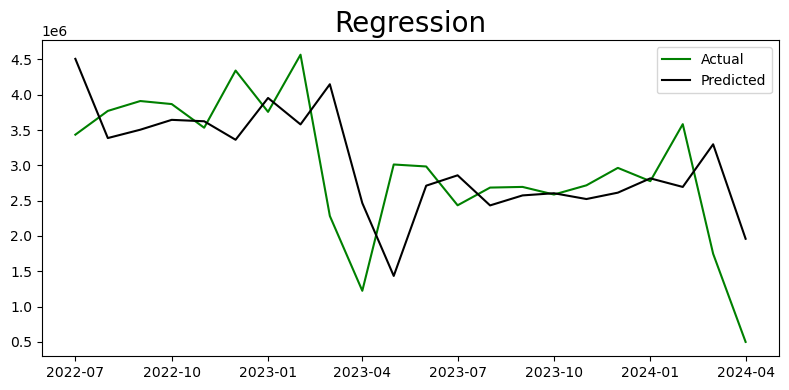

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test, label='Actual', color='green')
plt.plot(y_test.index, y_pred, label='Predicted', color='black')
plt.title('Regression', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.tight_layout()
plt.show()

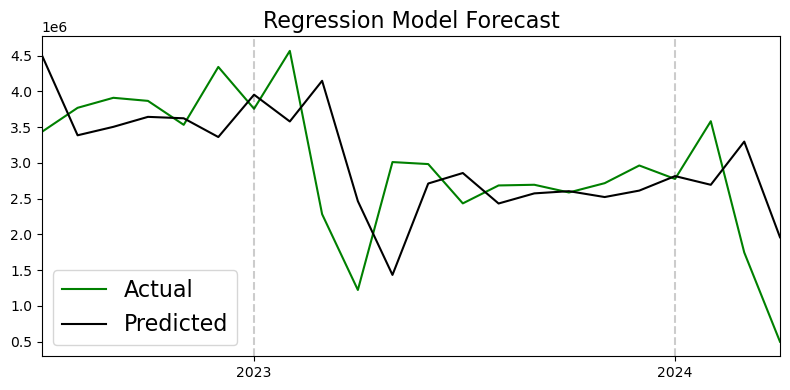

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

start_date = y_test.index.min()
end_date = y_test.index.max()

plt.figure(figsize=(8, 4))

plt.plot(y_test.index, y_test, label='Actual', color='green')
plt.plot(y_test.index, y_pred, label='Predicted', color='black')

plt.xlim(start_date, end_date)
plt.legend(fontsize=16)
plt.title('Regression Model Forecast', fontsize=16)
plt.xlabel('')
plt.ylabel('', fontsize=16)

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for year in range(start_date.year, end_date.year + 1):
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='k', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()


